Consignment Pricing Prediction

Data Collection

Dataset Source - https://www.kaggle.com/datasets/divyeshardeshana/supply-chain-shipment-pricing-data
The data consists of 33 columns and 10325 rows (appx.).

In [3]:
import numpy as np
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Import the CSV Data as Pandas DataFrame


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/PratikBorkar04/consignment_pricing/main/notebook/dataset/SCMS_Delivery_History_Dataset_1.csv")

Show Top 5 Records


In [5]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


Shape of the dataset


In [6]:
df.shape

(10324, 33)

Check Missing values

In [7]:
df.isna().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [8]:
df.duplicated().sum()


0

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [10]:
df.nunique()


ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

In [11]:
df.describe()


,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


#Exploring Data


In [12]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


FREIGHT COST ANALYSIS:


1. https://truckstop.com/blog/freight-shipping-costs/
2. https://www.gojarrett.com/blog/key-factors-that-influence-your-freight-costs
From the above links, the factors that affect freight costs are:


Distance: The farther the destination, the more it will cost to ship the goods.


Weight: Heavier items will require more fuel to transport and may incur additional handling fees.


Size: Large or bulky items may require special handling or equipment, which can increase the cost of shipping.


Mode of transportation: The method of transport used (e.g., air, ocean, truck, rail) will affect the cost.


Carrier: Different carriers have different pricing structures and fees, so the choice of carrier can affect the cost of shipping.


Destination: Shipping to remote or hard-to-reach locations may incur additional fees.


Packaging: Properly packaging items to prevent damage during transport can reduce the risk of additional fees.


Type of goods: Hazardous or fragile items may require special handling, which can increase the cost of shipping.



From the above knowledge, a total of 11 columns from the data set are selected, which are:


      1. Country 2. Shipment Mode 3. Unit of measure 4. Line Item Quantity 5. Line Item Value 6. Pack price 7. Unit Price 8. Weight (kilos) 9. Freight Cost (USD) [For Prediction] 10. Vendor INCO Term 11. Fulfil via

In [13]:
df.head(2)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN


In [14]:

cities_list = []
countries_list = []
for i in range(len(df)):
    text = df["Manufacturing Site"][i]
    if text:
        places = GeoText(text.title())
        cities = list(places.cities) if places.cities else []
        countries = list(places.countries) if places.countries else []
    else:
        cities = []
        countries = []
    cities_list.append(cities)
    countries_list.append(countries)

df["cities"] = cities_list
df["countries"] = countries_list


In [15]:
df["cities"] = cities_list
df["countries"] = countries_list
df.head(2)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),cities,countries
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN,[],[]
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN,[],[India]


In [16]:
print(df["countries"])
list_countries = []
list_cities = []

for i in range(len(df["countries"])):
    string_countries = ' '.join(df["countries"][i])
    list_countries.append(string_countries)

df["countries"] = list_countries

for j in range(len(df["cities"])):
    string_cities = ' '.join(df["cities"][j])
    list_cities.append(string_cities)

df["cities"] = list_cities

df["location"] = df[["countries" ,"cities"]].apply(lambda x: ', '.join(x[x.notnull()]), axis = 1)


0             []
1        [India]
2             []
3        [India]
4        [India]
          ...   
10319    [India]
10320         []
10321         []
10322         []
10323    [India]
Name: countries, Length: 10324, dtype: object


In [17]:
df.head(2)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),cities,countries,location
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN,,,","
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,6.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN,,India,"India,"


In [18]:
# choose first city/country from column
filter_list = []
for i in range(len(df["location"])):
    str1 = df["location"][i]
    parts = str1.split(",")
    result = parts[0] if parts[0] else parts[1]
    filter_list.append(result)
print(filter_list)
df["location"] = filter_list

[' ', 'India', ' ', 'India', 'India', 'India', ' ', 'India', 'India', ' ', 'Germany', ' ', ' ', 'India', ' ', 'France', ' ', 'India', 'France', ' ', ' ', 'France', 'India', 'Germany', ' ', 'Thailand', ' ', ' ', ' ', 'India', ' ', 'Canada', ' ', 'India', ' ', ' ', 'France', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' Nashik', ' ', 'France', 'France', 'France', ' ', ' ', ' ', ' Nashik', 'France', 'France', 'France', 'France', 'Thailand', ' ', ' ', 'India', 'Switzerland', 'India', 'Germany', ' Nashik', ' ', ' ', ' ', ' ', ' ', ' Haarlem', ' ', ' ', ' ', ' Port Elizabeth', ' Port Elizabeth', 'France', 'France', ' ', ' ', ' Haarlem', ' ', ' ', 'India', 'India', 'India', 'India', ' ', 'Germany', 'India', 'France', 'France', 'France', 'Germany', 'India', 'India', 'India', 'France', 'Canada', 'India', 'India', 'India', 'India', 'France', 'Germany', ' ', 'India', 'Thailand', 'Germany', ' ', ' ', ' Port Elizabeth', 'India', 'Thailand', ' ', ' ', ' ', ' ', 'France', 'India', 'Thailand', ' ', '

In [19]:
#Remove columns that are not required for prediction
list_not_required_columns = ['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #',
       'Managed By','PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form',
       'First Line Designation',
       'Line Item Insurance (USD)','countries','cities']
df = df.drop(list_not_required_columns,axis = 1)
df.head()

,Country,Fulfill Via,Vendor INCO Term,Shipment Mode,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,Weight (Kilograms),Freight Cost (USD),location
0,Côte d'Ivoire,Direct Drop,EXW,Air,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,13,780.34,
1,Vietnam,Direct Drop,EXW,Air,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",358,4521.5,India
2,Côte d'Ivoire,Direct Drop,FCA,Air,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,171,1653.78,
3,Vietnam,Direct Drop,EXW,Air,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",1855,16007.06,India
4,Vietnam,Direct Drop,EXW,Air,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",7590,45450.08,India


In [20]:
#Rename columns
df = df.rename(columns={"Country":"country","Manufacturing Site":"mfg_site","Fulfill Via":"fulfill_via","Vendor INCO Term":"vendor",
                   "Shipment Mode":"shipment_mode", "Unit of Measure (Per Pack)":"unit_of_measure",
                   "Line Item Quantity":"line_item_quantity","Pack Price":"pack_price",
                   "Unit Price":"unit_price","Weight (Kilograms)":"weight","Freight Cost (USD)":"freight_cost",
                   "Line Item Value":"line_item_value"})

In [21]:
df.head(2)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,mfg_site,weight,freight_cost,location
0,Côte d'Ivoire,Direct Drop,EXW,Air,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,13,780.34,
1,Vietnam,Direct Drop,EXW,Air,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",358,4521.5,India


In [22]:
print("categories in country ",end=" ")
print(df["country"].unique())

categories in country  ["Côte d'Ivoire" 'Vietnam' 'Nigeria' 'Zambia' 'Tanzania' 'Rwanda' 'Haiti'
 'Zimbabwe' 'Ethiopia' 'South Africa' 'Guyana' 'Namibia' 'Botswana'
 'Mozambique' 'Kenya' 'Kazakhstan' 'Uganda' 'Kyrgyzstan' 'Senegal' 'Benin'
 'Lesotho' 'Pakistan' 'Swaziland' 'Ghana' 'Angola' 'Lebanon'
 'Sierra Leone' 'Cameroon' 'South Sudan' 'Burundi' 'Dominican Republic'
 'Malawi' 'Congo, DRC' 'Sudan' 'Mali' 'Guatemala' 'Togo' 'Afghanistan'
 'Liberia' 'Burkina Faso' 'Guinea' 'Libya' 'Belize']


In [23]:
d_country = {}
for i in df["country"]:
    if i in d_country:
        d_country[i] = d_country[i] + 1
    else:
        d_country[i] = 1
sorted_dict = sorted(d_country.items(),key = lambda kv: kv[1],reverse=True)
len_total_countries =int(len(d_country) )
sum_total_countries = int(sum(d_country.values()))
avg = sum_total_countries/len_total_countries
print(avg)
print(sorted_dict)

240.09302325581396
[('South Africa', 1406), ('Nigeria', 1194), ("Côte d'Ivoire", 1083), ('Uganda', 779), ('Vietnam', 688), ('Zambia', 683), ('Haiti', 655), ('Mozambique', 631), ('Zimbabwe', 538), ('Tanzania', 519), ('Rwanda', 430), ('Congo, DRC', 333), ('Guyana', 237), ('Ethiopia', 216), ('South Sudan', 164), ('Kenya', 111), ('Burundi', 98), ('Namibia', 95), ('Cameroon', 75), ('Botswana', 70), ('Ghana', 58), ('Dominican Republic', 52), ('Sudan', 46), ('Swaziland', 35), ('Mali', 17), ('Pakistan', 15), ('Guatemala', 15), ('Malawi', 14), ('Benin', 13), ('Lebanon', 8), ('Libya', 8), ('Angola', 7), ('Liberia', 6), ('Lesotho', 4), ('Sierra Leone', 4), ('Senegal', 3), ('Togo', 3), ('Afghanistan', 3), ('Kazakhstan', 2), ('Kyrgyzstan', 2), ('Burkina Faso', 2), ('Guinea', 1), ('Belize', 1)]


df["Country] = From the above calculation, the average of all country counts is about 240. For the machine learning model, the countries that are selected are above count 240.

In [24]:
df.shape

(10324, 13)

In [25]:
#remove countries whose average is less than 240
list_not_required_rows = ['Ethiopia' , 'Guyana' ,'Namibia' ,'Botswana',
  'Kenya' ,'Kazakhstan' ,'Kyrgyzstan' ,'Senegal' ,'Benin',
 'Lesotho' ,'Pakistan' ,'Swaziland' ,'Ghana' ,'Angola', 'Lebanon',
 'Sierra Leone' ,'Cameroon' ,'South Sudan' ,'Burundi' ,'Dominican Republic',
 'Malawi' ,'Sudan' ,'Mali' ,'Guatemala' ,'Togo' ,'Afghanistan',
 'Liberia','Burkina Faso' ,'Guinea' ,'Libya' ,'Belize']

list_contains_space = [' ']
df = df[~df["location"].isin(list_contains_space)]
df = df[~df["country"].isin(list_not_required_rows)]
df = df.reset_index(drop=True)
print(df.head(5352))
print(df.shape)

         country  fulfill_via          vendor shipment_mode  unit_of_measure   
0        Vietnam  Direct Drop             EXW           Air              240  \
1        Vietnam  Direct Drop             EXW           Air               60   
2        Vietnam  Direct Drop             EXW           Air               60   
3        Nigeria  Direct Drop             EXW           Air              240   
4       Tanzania  Direct Drop             EXW           Air               60   
...          ...          ...             ...           ...              ...   
5347     Nigeria     From RDC  N/A - From RDC   Air Charter              120   
5348     Nigeria     From RDC  N/A - From RDC   Air Charter              120   
5349      Uganda     From RDC  N/A - From RDC           Air              120   
5350  Congo, DRC     From RDC  N/A - From RDC           Air               60   
5351  Mozambique     From RDC  N/A - From RDC         Truck               60   

      line_item_quantity  line_item_val

In [26]:
#define categorical columns and numerical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['unit_of_measure', 'line_item_quantity', 'line_item_value', 'pack_price', 'unit_price']

We have 8 categorical features : ['country', 'fulfill_via', 'vendor', 'shipment_mode', 'mfg_site', 'weight', 'freight_cost', 'location']


In [27]:
#country  fulfill_via vendor shipment_mode  unit_of_measure        
#line_item_quantity  line_item_value  pack_price  unit_price   

print("Categories in 'fulfill_via' variable:     ",end=" " )
print(df['fulfill_via'].unique())

print("Categories in 'vendor' variable:     ",end=" " )
print(df['vendor'].unique())

print("Categories in 'shipment_mode' variable:     ",end=" " )
print(df['shipment_mode'].unique())

print("Categories in 'weight' variable:     ",end=" " )
print(df['weight'].unique())

print("Categories in 'freight_cost' variable:     ",end=" " )
print(df['freight_cost'].unique())


Categories in 'fulfill_via' variable:      ['Direct Drop' 'From RDC']
Categories in 'vendor' variable:      ['EXW' 'CIP' 'FCA' 'DDP' 'N/A - From RDC' 'DAP' 'DDU']
Categories in 'shipment_mode' variable:      ['Air' nan 'Truck' 'Air Charter' 'Ocean']
Categories in 'weight' variable:      ['358' '1855' '7590' ... '1547' 'See DN-4282 (ID#:83919)' '1392']
Categories in 'freight_cost' variable:      ['4521.5' '16007.06' '45450.08' ... '26180' '3410'
 'See DN-4282 (ID#:83919)']


In [28]:
# Freight Cost = (Unit of Measure * Line Item Quantity * Unit Price * Distance * Weight) / (100 * Line Item Value) + Additional Charges
# df['f_cost'] = (df["unit_of_measure"] * df["line_item_quantity"] * df["unit_price"] * df["distance"] * df["weight"] )/(100 * df["line_item_value"])

In [29]:
df.head(2)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,mfg_site,weight,freight_cost,location
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",358,4521.5,India
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",1855,16007.06,India


In [30]:
d = {}
for i in df["location"]:
    if i in d:
        d[i] = d[i] + 1
    else:
        d[i] = 1
print(d)
sum(d.values()) - 2437

{'India': 4257, 'Germany': 352, 'France': 170, 'Thailand': 20, 'Canada': 58, ' Nashik': 1295, 'Switzerland': 5, ' Haarlem': 118, ' Port Elizabeth': 137, 'South Africa': 21, 'Puerto Rico': 9, ' Latina': 54, 'Poland': 3, 'Cyprus': 1, 'China': 2}


4065

In [31]:

len(df)

6502

In [32]:
d = {}
for i in df["location"]:
    if i in d:
        d[i] = d[i] + 1
    else:
        d[i] = 1
print(d)

{'India': 4257, 'Germany': 352, 'France': 170, 'Thailand': 20, 'Canada': 58, ' Nashik': 1295, 'Switzerland': 5, ' Haarlem': 118, ' Port Elizabeth': 137, 'South Africa': 21, 'Puerto Rico': 9, ' Latina': 54, 'Poland': 3, 'Cyprus': 1, 'China': 2}


In [33]:


df.head()

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,mfg_site,weight,freight_cost,location
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",358,4521.5,India
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",1855,16007.06,India
2,Vietnam,Direct Drop,EXW,Air,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",7590,45450.08,India
3,Nigeria,Direct Drop,EXW,Air,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",504,5920.42,India
4,Tanzania,Direct Drop,EXW,Air,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",1478,6212.41,India


In [34]:
distance = pd.read_csv("https://raw.githubusercontent.com/PratikBorkar04/consignment_pricing/main/notebook/dataset/distance_location%20(2).csv")

In [35]:
df = pd.concat([df,distance],axis = 1)


In [36]:
df = df.drop(['Unnamed: 0', 'mfg_site'], axis=1)


In [37]:
df.head()

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200.00,6.20,0.03,358,4521.5,India,3157
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360.80,3.99,0.07,1855,16007.06,India,3157
2,Vietnam,Direct Drop,EXW,Air,60,38000,121600.00,3.20,0.05,7590,45450.08,India,3157
3,Nigeria,Direct Drop,EXW,Air,240,416,2225.60,5.35,0.02,504,5920.42,India,7633
4,Tanzania,Direct Drop,EXW,Air,60,16667,60834.55,3.65,0.06,1478,6212.41,India,5659


In [38]:
df.shape

(6502, 13)

In [40]:
#Replacing Freight cost with mean
df['freight_cost'] = df['freight_cost'].replace('[A-Za-z]', 0, regex=True)
df['freight_cost'] = df['freight_cost']
df['freight_cost'] = pd.to_numeric(df['freight_cost'], errors ='coerce')
mean_value = np.mean(df['freight_cost'][df['freight_cost'] != 0])
df.loc[df['freight_cost'] == 0, 'freight_cost'] = mean_value

In [41]:
#Replacing weight with mean
df['weight'] = df['weight'].replace('[A-Za-z]', 0, regex=True)
df['weight'] = pd.to_numeric(df['weight'], errors ='coerce')
mean_value = np.mean(df['weight'][df['weight'] != 0])
df.loc[df['weight'] == 0, 'weight'] = mean_value

In [42]:
df.head(1)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200.0,6.2,0.03,358.0,4521.5,India,3157


In [43]:
#convert dtype into int 
df['weight'] = df['weight'].astype('int64')
df['line_item_value'] = df['line_item_value'].astype('int64')
df["freight_cost"] = df["freight_cost"].astype('int64')
df["pack_price"] = df["pack_price"].astype('int64')



In [44]:
df.dtypes

country                object
fulfill_via            object
vendor                 object
shipment_mode          object
unit_of_measure         int64
line_item_quantity      int64
line_item_value         int64
pack_price              int64
unit_price            float64
weight                  int64
freight_cost            int64
location               object
distance                int64
dtype: object

In [45]:
df.head(1)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,4521,India,3157


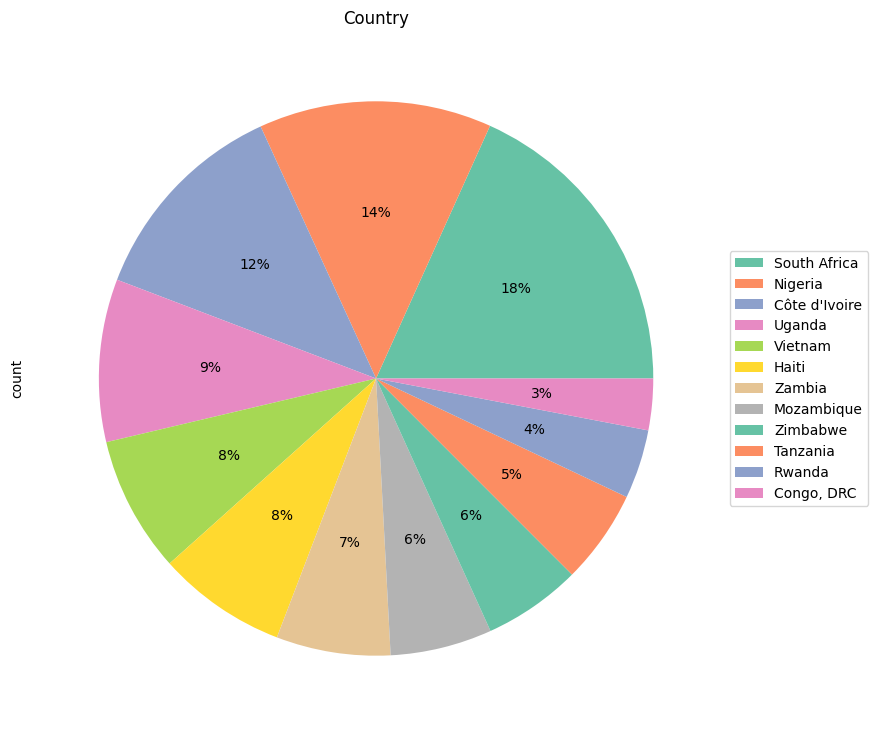

In [46]:
#Country column analysis
counts = df['country'].value_counts()
idx = counts[counts.lt(30)].index
colors = sns.color_palette('Set2')
df["country"].value_counts().plot.pie(title="Country",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

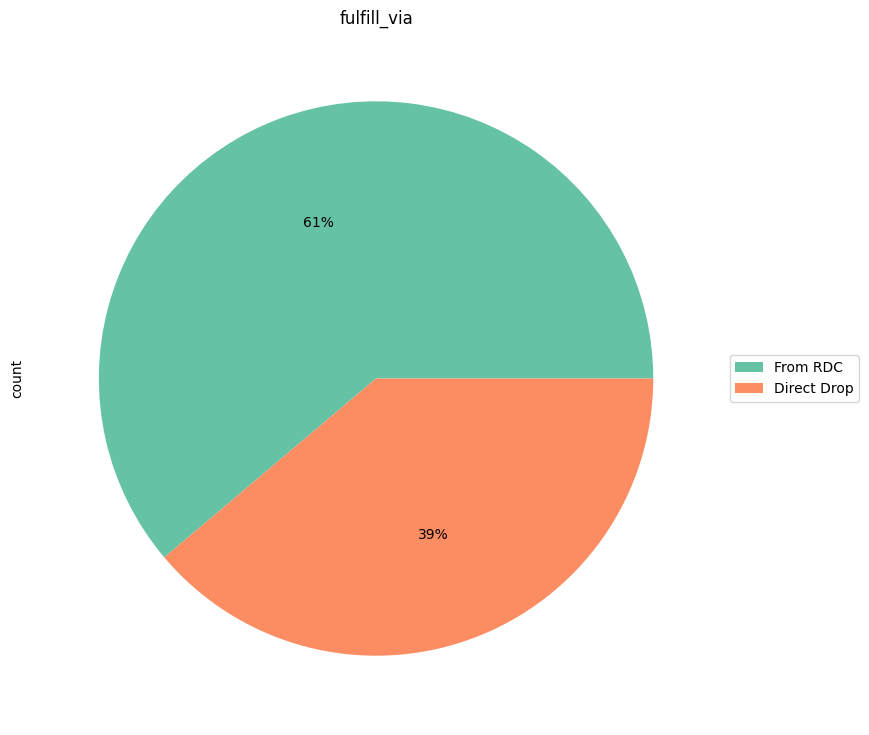

In [47]:
#fulfill_via column analysis
counts = df['fulfill_via'].value_counts()
idx = counts[counts.lt(30)].index
colors = sns.color_palette('Set2')
df["fulfill_via"].value_counts().plot.pie(title="fulfill_via",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

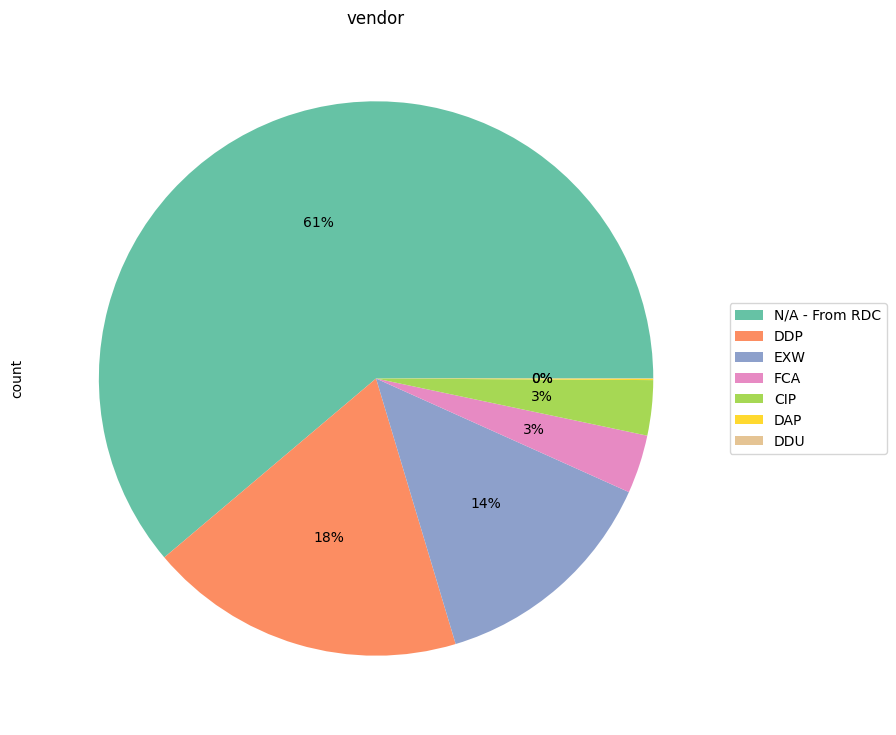

In [48]:
#vendor column analysis
counts = df['vendor'].value_counts()
idx = counts[counts.lt(30)].index
colors = sns.color_palette('Set2')
df["vendor"].value_counts().plot.pie(title="vendor",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [49]:
# Replacing "N/A - From RDC"->"RDC"

df['vendor'] = df['vendor'].replace("N/A - From RDC", "RDC")


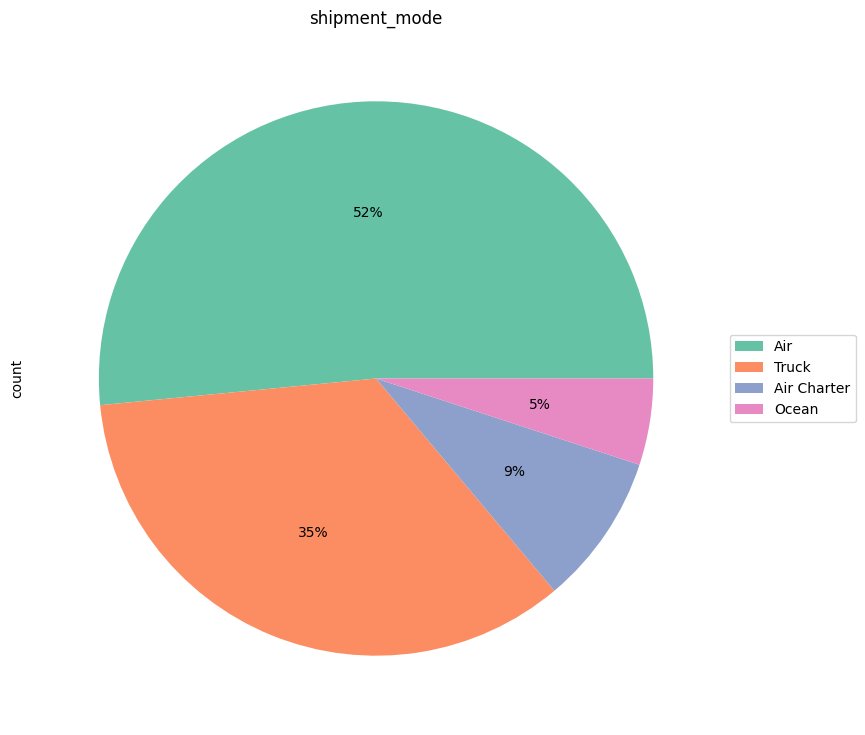

In [50]:
#shipment_mode column analysis
counts = df['shipment_mode'].value_counts()
idx = counts[counts.lt(30)].index
colors = sns.color_palette('Set2')
df["shipment_mode"].value_counts().plot.pie(title="shipment_mode",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

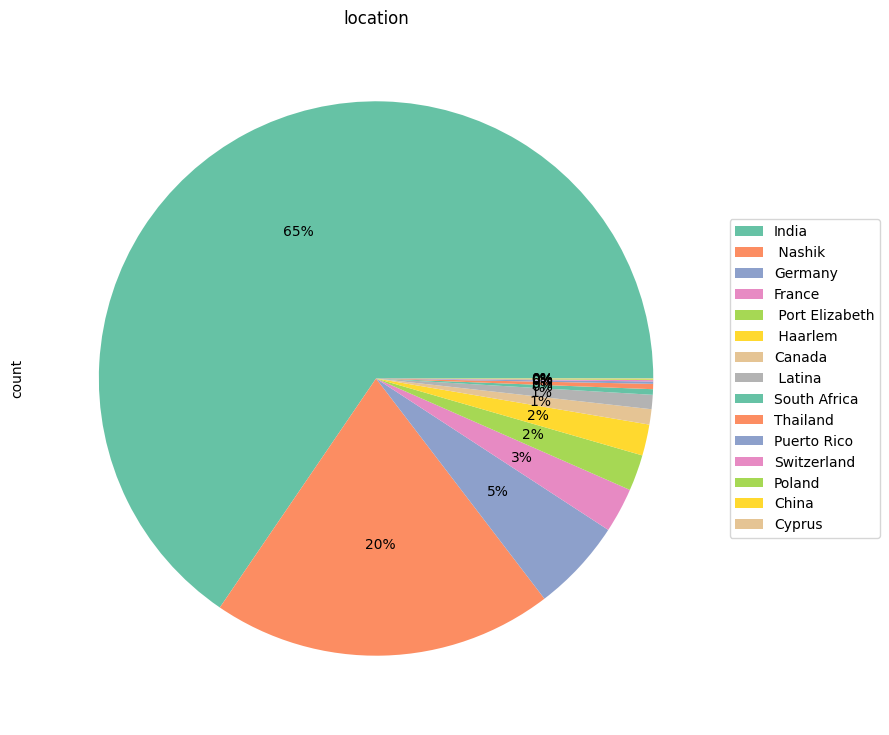

In [51]:
#location column analysis
counts = df['location'].value_counts()
idx = counts[counts.lt(30)].index
colors = sns.color_palette('Set2')
df["location"].value_counts().plot.pie(title="location",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None,colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [52]:
df.head(1)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,4521,India,3157


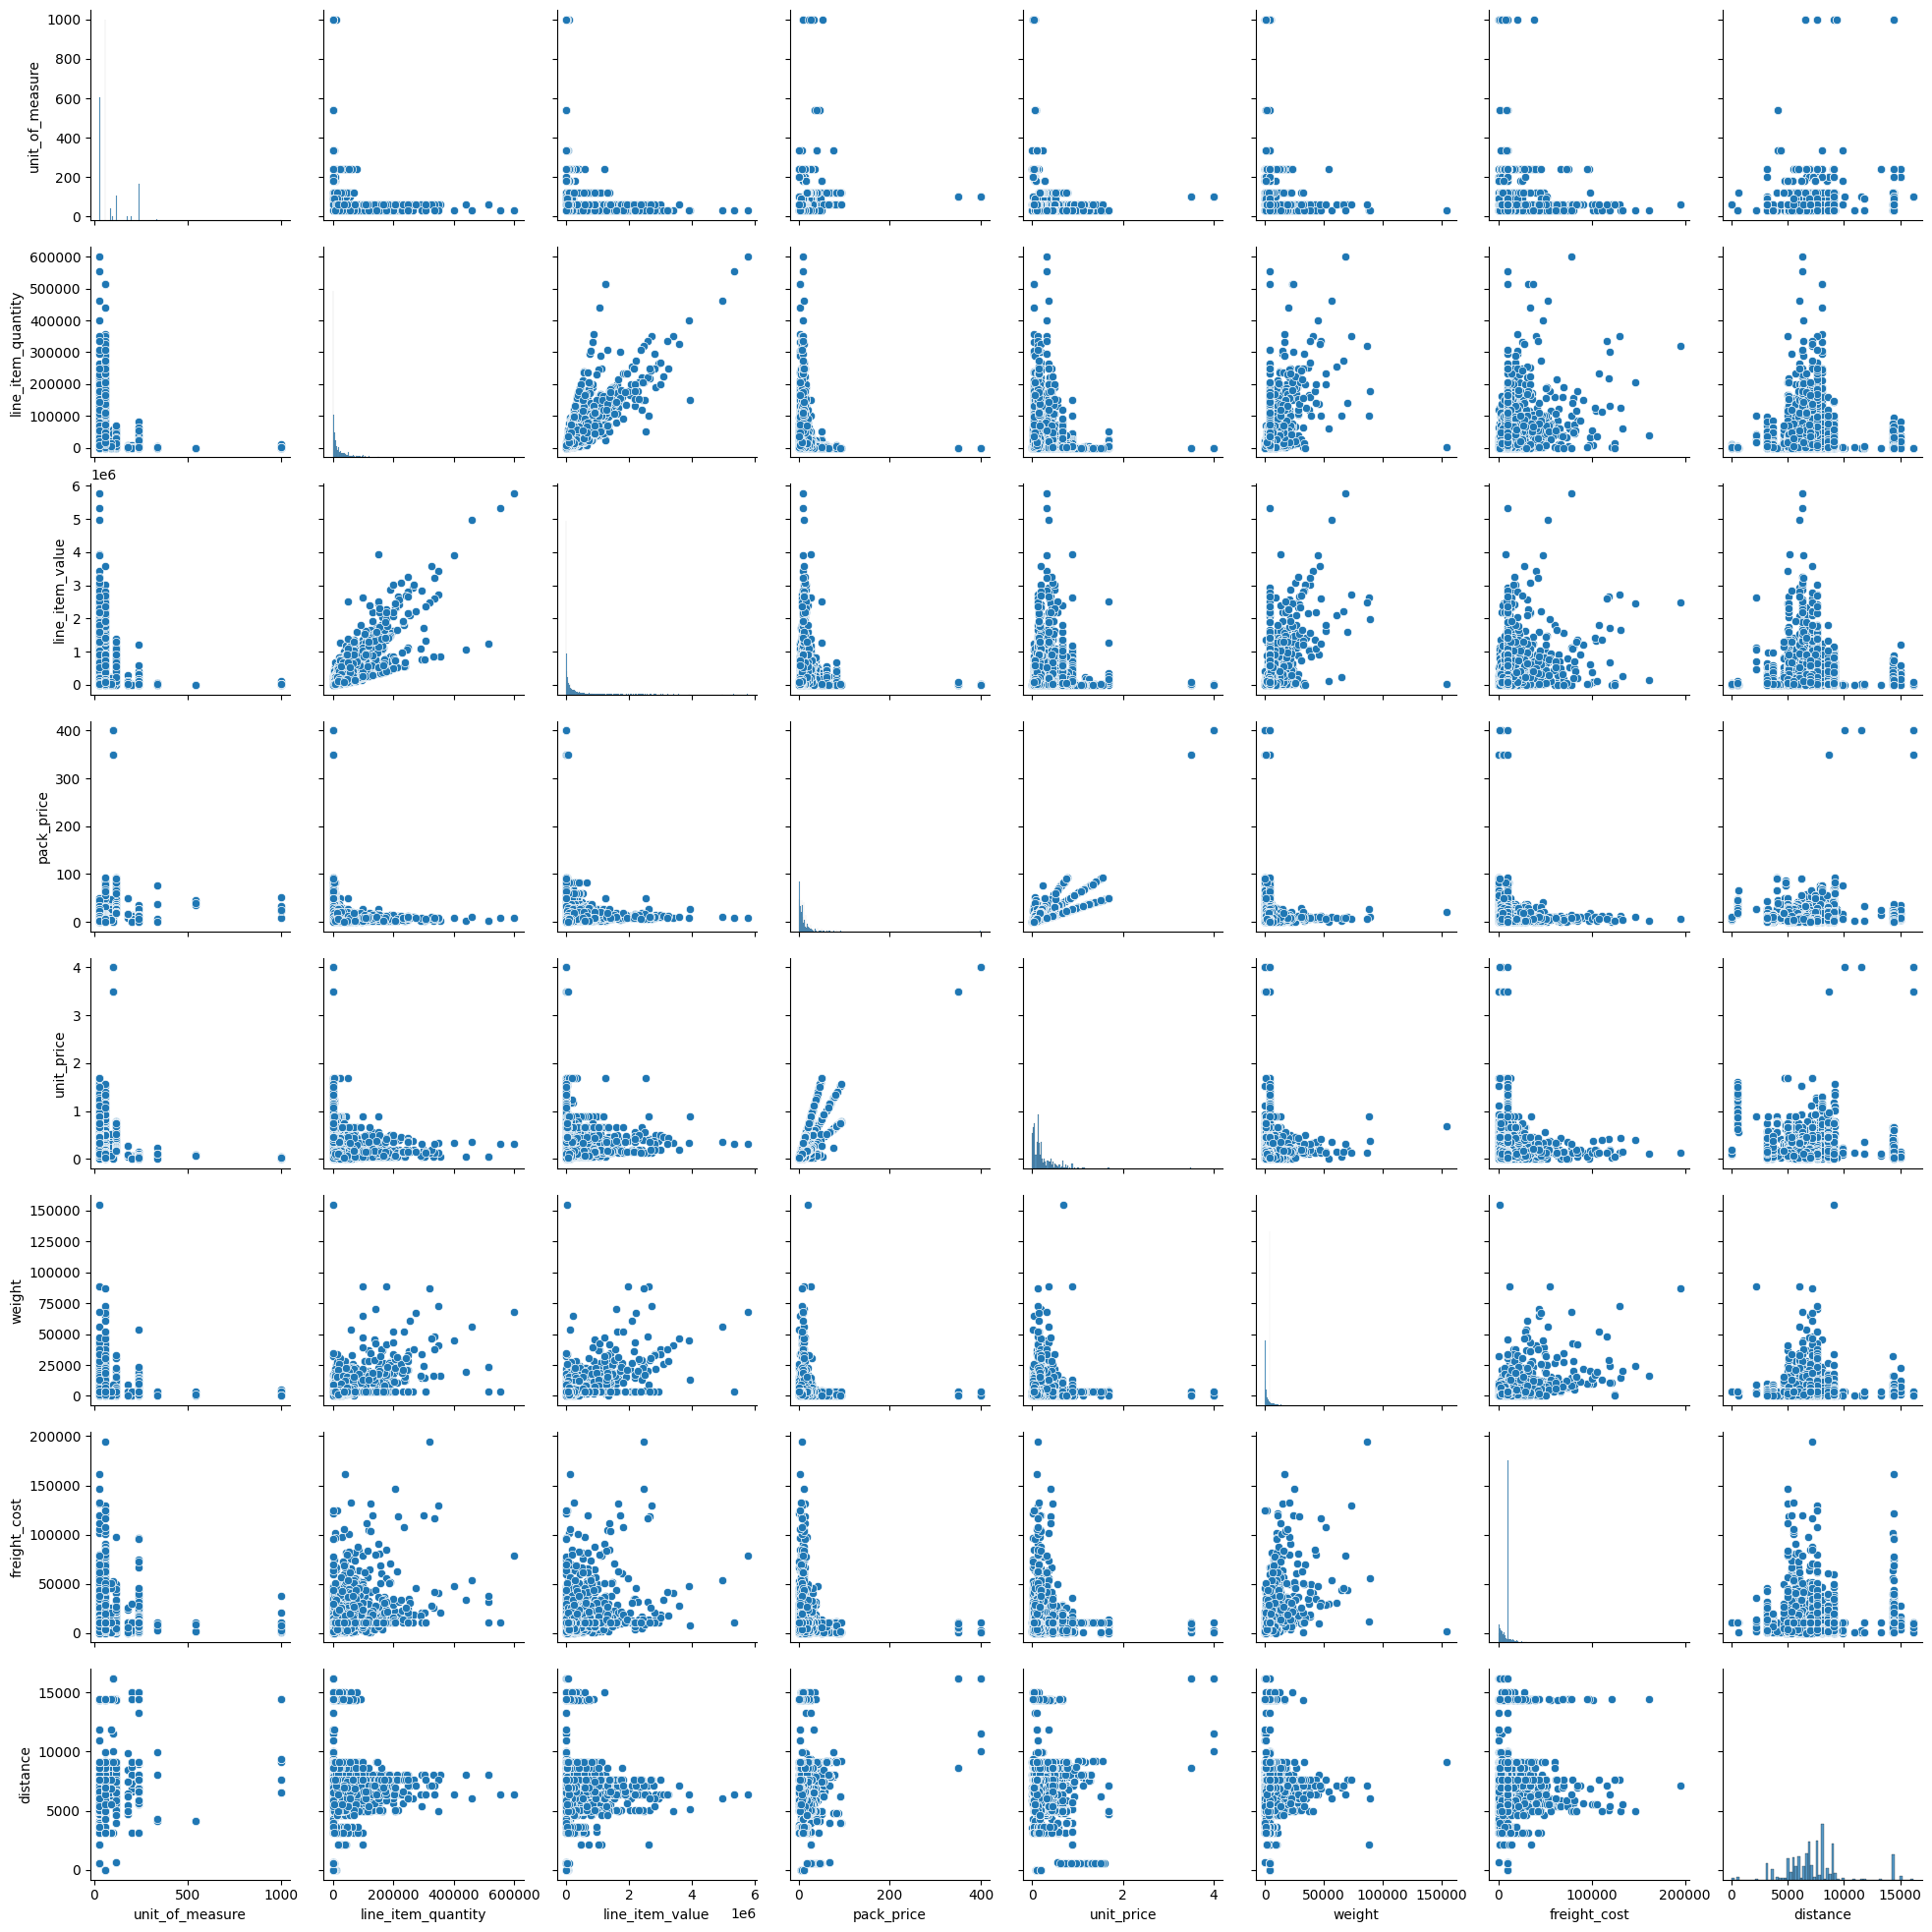

In [53]:
#plotting all the columns to check correaltion between them
sns.pairplot(df)


In [55]:
df.head(1)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,4521,India,3157


In [54]:
#define categorical columns and numerical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['unit_of_measure', 'line_item_quantity', 'line_item_value', 'pack_price', 'unit_price', 'weight', 'freight_cost', 'distance']

We have 5 categorical features : ['country', 'fulfill_via', 'vendor', 'shipment_mode', 'location']


AttributeError: module 'pickle' has no attribute '__version__'